# Sentiment Analysis on Women's Clothes Reviews 

This project will focus on using Natural Language Processing (NLP) techniques to find broad trends in the written thoughts of the customers. The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the "Review Text" variable using text mining techniques. The other challenge is that we need to convert text files into numeric feature vectors to run machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# import missingno as msno 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 


# plot_confusion_matrix,
from sklearn.metrics import  classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score


from yellowbrick.classifier import PrecisionRecallCurve

import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.express as px
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")




[nltk_data] Downloading package punkt to C:\Users\AHMED
[nltk_data]     REDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\AHMED
[nltk_data]     REDA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AHMED
[nltk_data]     REDA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\AHMED
[nltk_data]     REDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\AHMED
[nltk_data]     REDA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AHMED
[nltk_data]     REDA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact


In [3]:
###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number','Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    

                    

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')    
        
        
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop realted columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
    
###############################################################################

# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))
    
###############################################################################

# 2. Data 

#  About the Features 


1) Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

2) Age: Positive Integer variable of the reviewers age.

3) Title: String variable for the title of the review.

4) Review Text: String variable for the review body.

5) Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

6) Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

7) Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

8) Division Name: Categorical name of the product high level division.

9) Department Name: Categorical name of the product department name.

10) Class Name: Categorical name of the product class name.

# Reading the Data


In [4]:
df0 = pd.read_csv("data.csv")
df = df0.copy()
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION

In [5]:
# A General Looking at the Data  
first_looking(df)

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
------------------------------------------

In [6]:
df.drop("unnamed:_0", axis=1, inplace=True)
df.head(1)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates


In [7]:
df.shape

(23486, 10)

In [8]:
# to find how many unique values numerical features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

clothing_id feature has 1206 unique values.
age feature has 77 unique values.
rating feature has 5 unique values.
recommended_ind feature has 2 unique values.
positive_feedback_count feature has 82 unique values.


In [9]:
# to find how many unique values object features have

for col in df.select_dtypes(include="object").columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

title feature has 13993 unique values.
review_text feature has 22634 unique values.
division_name feature has 3 unique values.
department_name feature has 6 unique values.
class_name feature has 20 unique values.


# Customer Recommendation Distribution

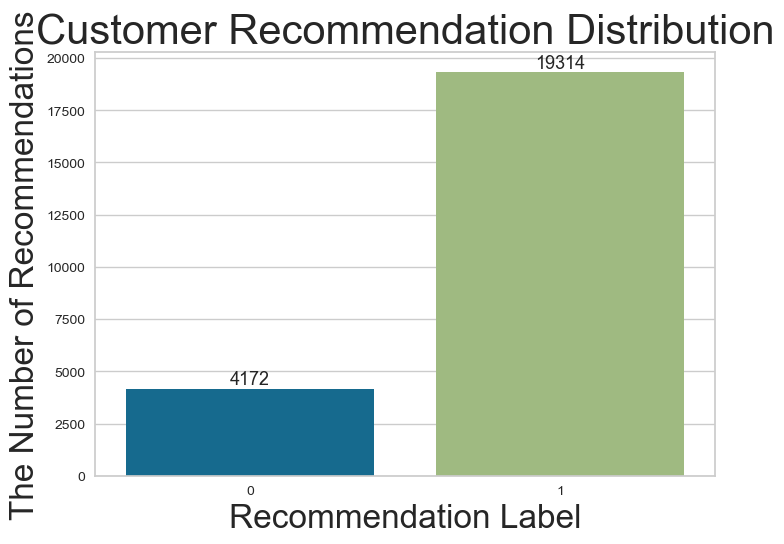

In [10]:
sns.countplot(x = df.recommended_ind, data = df)
plt.title('Customer Recommendation Distribution', fontsize=30)
plt.xlabel("Recommendation Label", fontsize=24)
plt.ylabel("The Number of Recommendations", fontsize=24)

for index,value in enumerate(df.recommended_ind.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

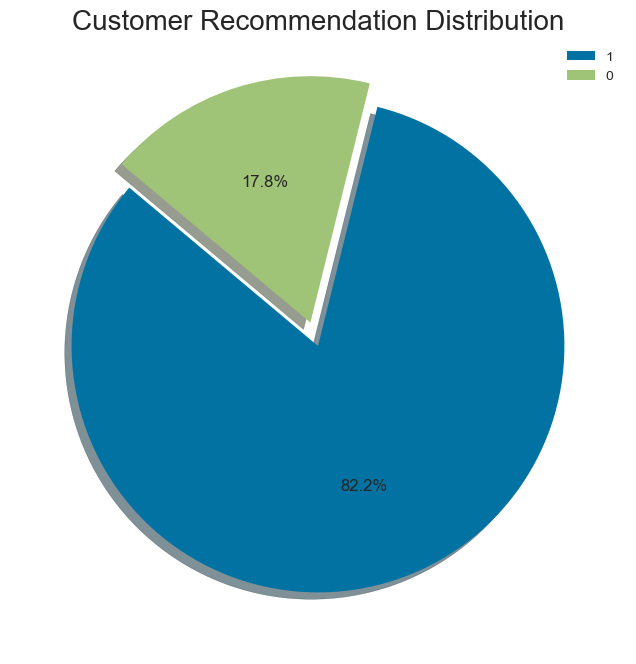

In [11]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['recommended_ind'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution', fontsize=20)
plt.axis('off');

# Customer Rating Distribution

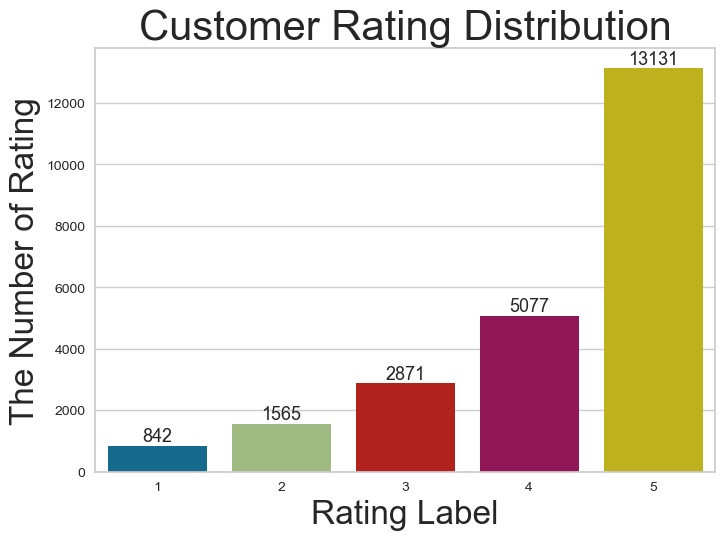

In [12]:
sns.countplot(x = df.rating, data = df)
plt.title('Customer Rating Distribution', fontsize=30)
plt.xlabel("Rating Label", fontsize=24)
plt.ylabel("The Number of Rating", fontsize=24)

for index,value in enumerate(df.rating.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

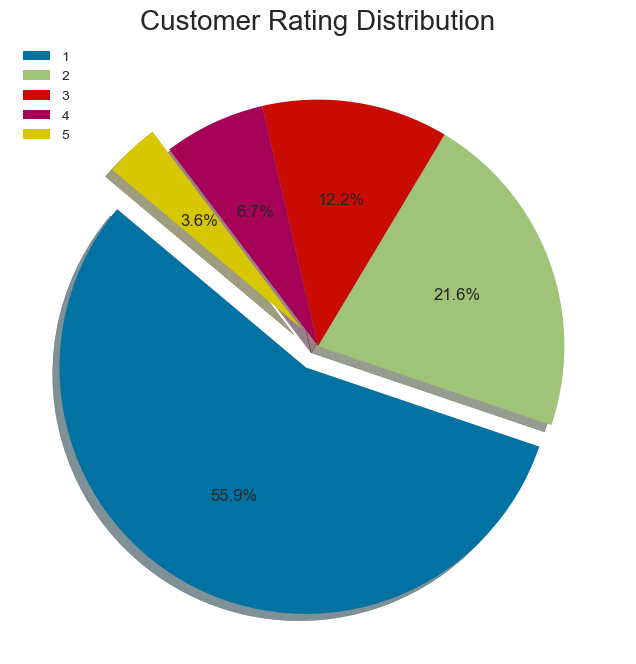

In [13]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0.1]
plt.pie(df['rating'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '2', '3', '4','5'])
plt.title('Customer Rating Distribution', fontsize=20)
plt.axis('off');

# Customer Age Distribution

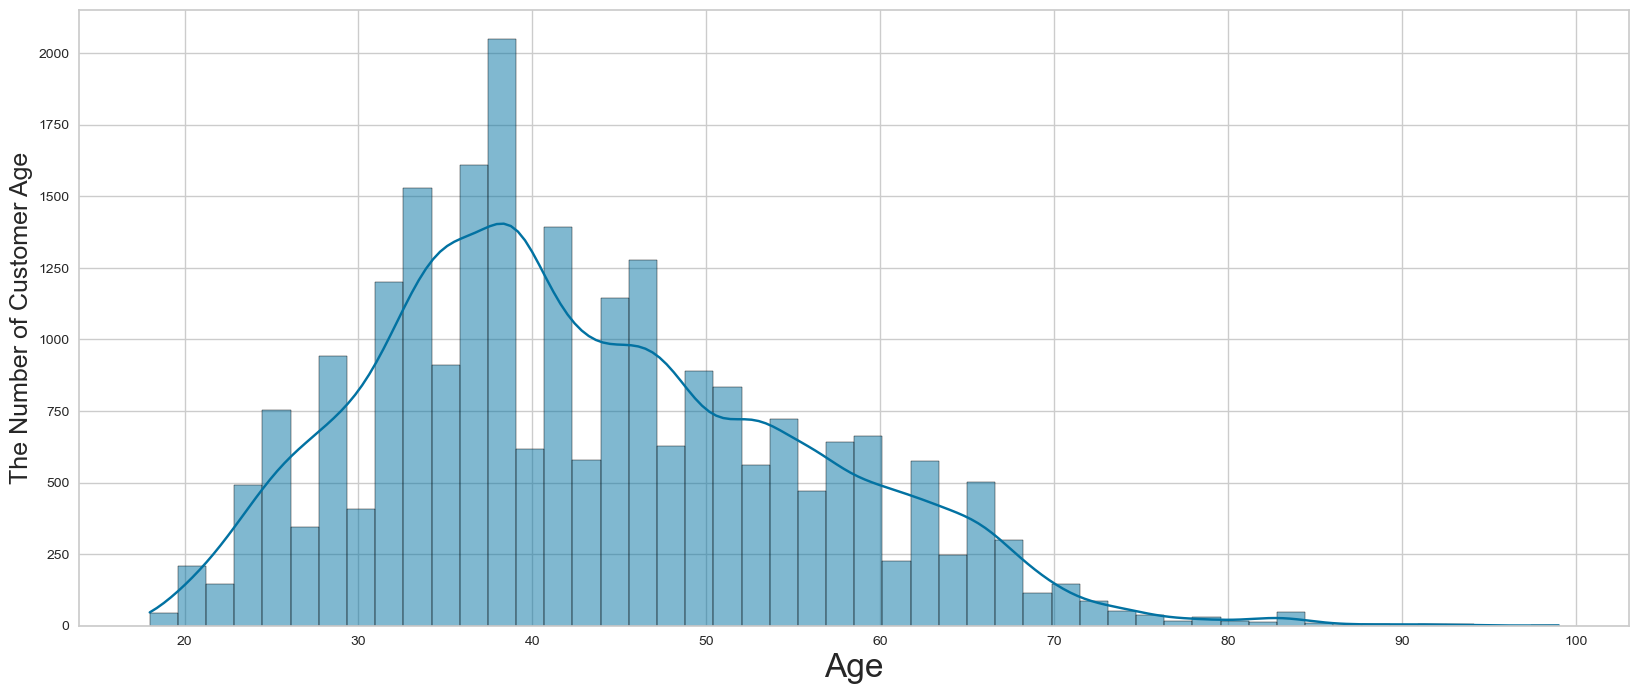

In [14]:
plt.figure(figsize = (20, 8))
plt.title('', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("The Number of Customer Age", fontsize=18)

sns.histplot(df, x='age', kde = True, bins = 50);

In [15]:
df["positive_feedback_count"].value_counts()

0      11176
1       4043
2       2193
3       1433
4        922
       ...  
94         1
117        1
71         1
84         1
59         1
Name: positive_feedback_count, Length: 82, dtype: int64

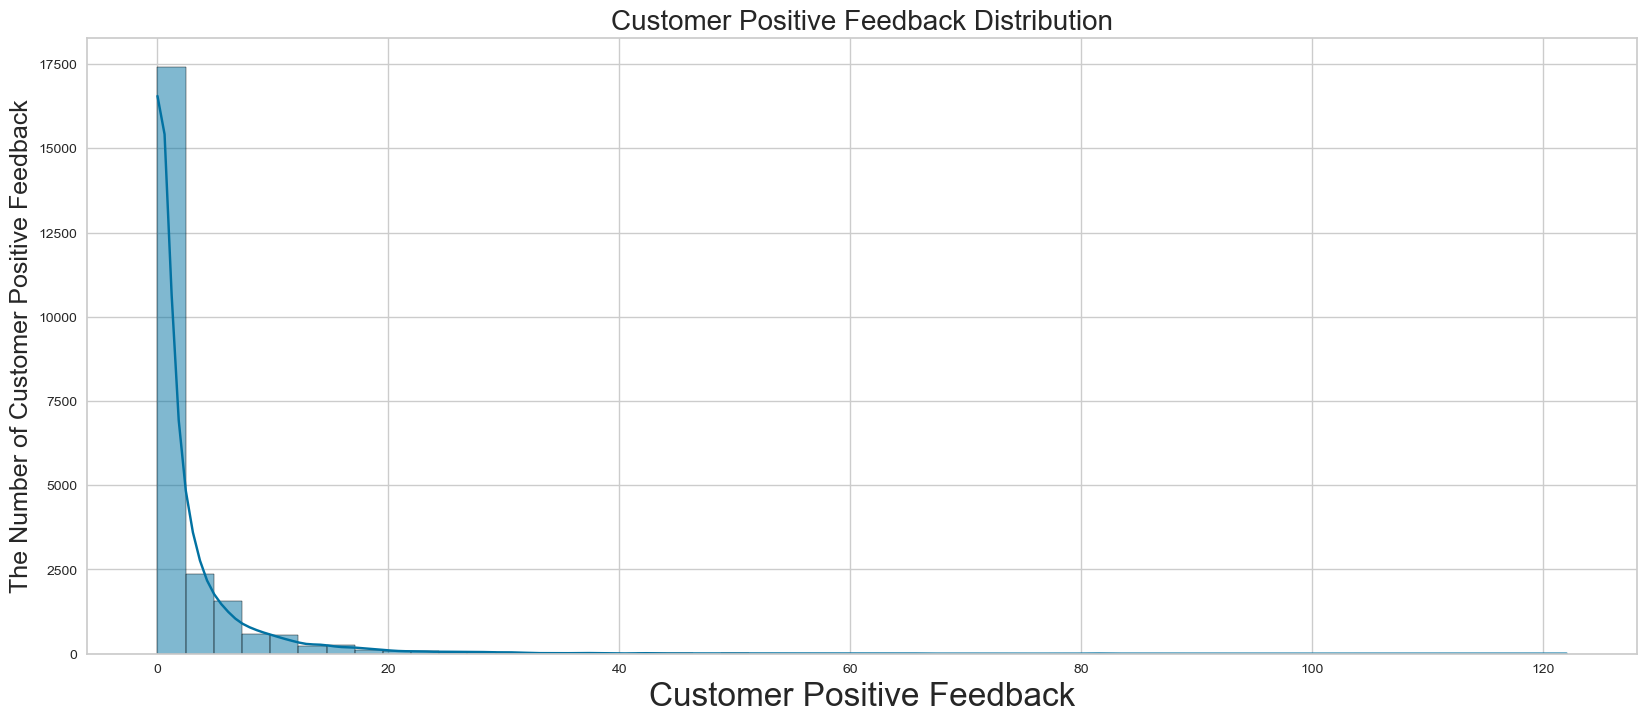

In [16]:
plt.figure(figsize = (20, 8))
plt.title('Customer Positive Feedback Distribution', fontsize=20)
plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("The Number of Customer Positive Feedback", fontsize=18)

sns.histplot(df, x='positive_feedback_count', kde = True, bins = 50);

Let's create categorical and numerical sets for the examination of crosstab information.

In [17]:
df_cat = df[['division_name', 'department_name', 'class_name', "recommended_ind"]]
df_cat["recommended_ind"] = df_cat["recommended_ind"].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")
df_cat.rename({'division_name': 'Division Name', 'department_name': 'Department Name', 'class_name': 'Class Name', 'recommended_ind': 'Recommendation Indicator'}, axis=1, inplace=True)
df_cat

,Division Name,Department Name,Class Name,Recommendation Indicator
0,Initmates,Intimate,Intimates,Recommended
1,General,Dresses,Dresses,Recommended
2,General,Dresses,Dresses,Not Recommended
3,General Petite,Bottoms,Pants,Recommended
4,General,Tops,Blouses,Recommended
...,...,...,...,...
23481,General Petite,Dresses,Dresses,Recommended
23482,General Petite,Tops,Knits,Recommended
23483,General Petite,Dresses,Dresses,Not Recommended
23484,General,Dresses,Dresses,Recommended


In [18]:
for i, col in enumerate(df_cat.columns):
    xtab = pd.crosstab(df_cat[col], df_cat["Recommendation Indicator"], normalize=True)
    print(colored('-'*55, 'red', attrs=['bold']), sep='')
    print(xtab*100)

-------------------------------------------------------
Recommendation Indicator  Not Recommended  Recommended
Division Name                                         
General                         10.808623    48.197853
General Petite                   6.019939    28.574472
Initmates                        0.945808     5.453306
-------------------------------------------------------
Recommendation Indicator  Not Recommended  Recommended
Department Name                                       
Bottoms                          2.407123    13.778119
Dresses                          5.163599    21.757839
Intimate                         1.107703     6.284083
Jackets                          0.720007     3.676721
Tops                             8.243865    36.353954
Trend                            0.132072     0.374915
-------------------------------------------------------
Recommendation Indicator  Not Recommended  Recommended
Class Name                                            
Blouses

# Feature Selection

In [19]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [20]:
# For later parts of the analysis, we will drop unnecassary columns for NLP.
df.drop(['clothing_id', 'age', 'title', 'rating',
       'positive_feedback_count', 'division_name',
       'department_name', 'class_name'], axis=1, inplace=True)

In [21]:
df.head(3)

,review_text,recommended_ind
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0


# Detecting & Handling With Missing Values

In [22]:
df['review_text'].isnull().value_counts()

False    22641
True       845
Name: review_text, dtype: int64

In [23]:
df['recommended_ind'].isnull().value_counts()

False    23486
Name: recommended_ind, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      22641 non-null  object
 1   recommended_ind  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [25]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      22641 non-null  object
 1   recommended_ind  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


Sometimes we cannot detect missing values if they consist of empty (blank) string such as " ". In this situation we can use the following syntax.

In [26]:
blanks = []  # start with an empty list

for rv in df.itertuples(): # iterate over the DataFrame
    if type(rv)==str and rv.isspace(): # avoid NaN values and test 'review' for whitespace
        blanks.append(i)
blanks

[]

In [27]:
df["review_text"].str.isspace().sum()

0

In [28]:
df[df["review_text"].str.isspace() == True].index

Int64Index([], dtype='int64')

# TEXT MINING

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing.

The three key steps of text preprocessing:

(1) Tokenization: This step is one of the top priorities when it comes to working on text mining. Tokenization is     essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as         individual words or terms. Each of these smaller units are called tokens.

(2) Noise Removal: Any piece of text which is not relevant to the context of the data and the end-output can be       specified as the noise. For example – language stopwords (commonly used words of a language – is, am, the, of, in   etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step     deals with removal of all types of noisy entities present in the text.

(3) Lexicon Normalization: Another type of textual noise is about the multiple representations exhibited by single   word. For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word –   “play”. Though they mean different things, contextually they all are similar. 

This step converts all the disparities of a word into their normalized form (also known as lemma). There are two methods of lexicon normalisation; Stemming or Lemmatization. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case. Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.

Note: Use the functions of the **nltk Library** for all the above operations.

# Tokenization, Noise Removal & Lexicon Normalization

In [29]:
def cleaning_data(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [30]:
stop_words = stopwords.words('english')

In [31]:
text = cleaning_data(str(df["review_text"]))
text

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name length dtype object'

In [32]:
df["review_text"] = df["review_text"].apply(cleaning_data)
df["review_text"].head(5)

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review_text, dtype: object

In [33]:
df.head(3)

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0


# WORLDCLOUD - REPETITION OF WORDS

Now we'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

We are expected to create separate word clouds for positive and negative reviews. As such we can qualify a review as positive or negative, by looking at its recommended status.

We can follow the steps below:

Detect Reviews
Collect Words
Create Word Cloud

# The Detection of Positive and Negative Reviews

In [34]:
df.columns

Index(['review_text', 'recommended_ind'], dtype='object')

In [35]:
df[df["recommended_ind"] == 0]

,review_text,recommended_ind
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one petite foot tall us...,0
10,dress run small esp zipper area run ordered sp...,0
22,first pullover styling side zipper wouldnt pur...,0
25,loved material didnt really look long dress pu...,0
...,...,...
23449,tried color really pretty fun donset want pair...,0
23450,wanted love jacket soft great color unfortunat...,0
23460,purchased good price typically love maeve winw...,0
23478,surprised positive review product terrible cut...,0


In [36]:
df[df["recommended_ind"] == 1]

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,aded basket hte last mintue see would look lik...,1
...,...,...
23479,wasnt sure ordering skirt couldnt see person f...,1
23481,happy snag dress great price easy slip flatter...,1
23482,reminds maternity clothes soft stretchy shiny ...,1
23484,bought dress wedding summer cute unfortunately...,1


In [37]:
df["recommended_ind"].value_counts()

1    18540
0     4101
Name: recommended_ind, dtype: int64

In [38]:
" ".join(df["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'complimen

In [39]:
pos_words =" ".join(df[df["recommended_ind"] == 1].review_text).split()
pos_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'msal

In [40]:
neg_words =" ".join(df[df["recommended_ind"] == 0].review_text).split()
neg_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typi

# Creating of Word Cloud 

In [41]:
review_text = df["review_text"]

In [42]:
all_words = " ".join(review_text)

In [43]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

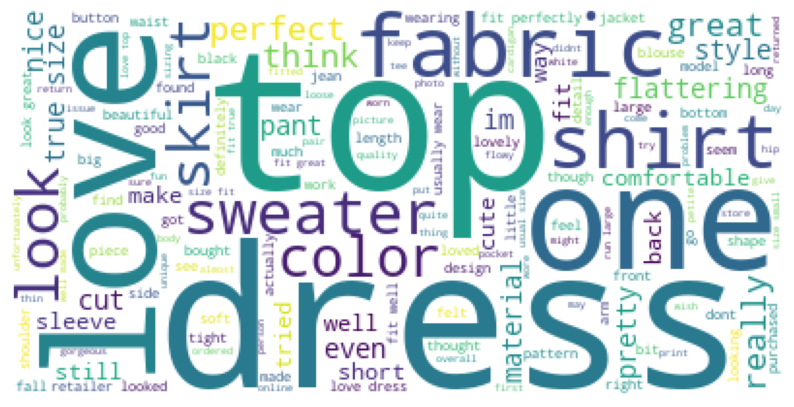

In [44]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

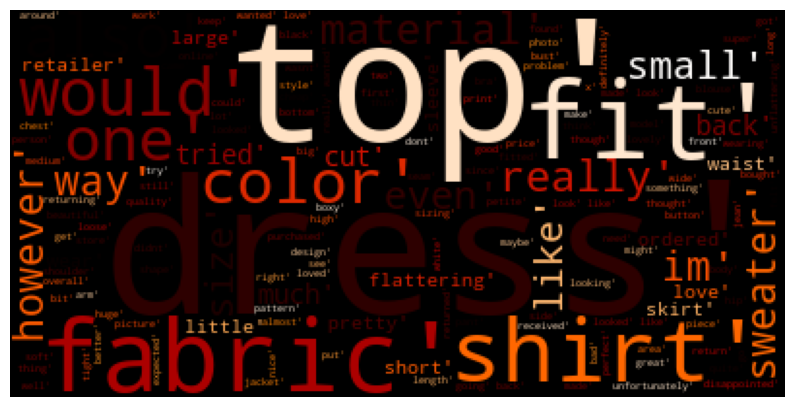

In [45]:
wordcloud = WordCloud(background_color="black", max_words =250, colormap='gist_heat').generate(str(neg_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

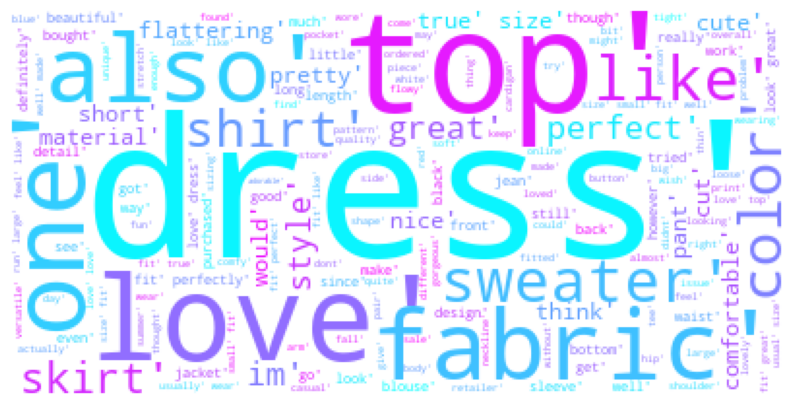

In [46]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='cool').generate(str(pos_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# SENTIMENT CLASSIFICATION WITH MACHINE LEARNING

Before moving on to modeling, as data preprocessing steps WE will need to perform vectorization and train-test split. But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that we will use here is to represent each text as a vector of word counts.

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. We can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

For Deep learning model, we will implement embedding layer for all words.

After performing data preprocessing, we will build your models using following classification algorithms:

Logistic Regression,

Naive Bayes,

Support Vector Machine,

Random Forest,

Ada Boosting

Deep Learning Model.

# Train | Test & Split 

In [47]:
df.head()

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


In [48]:
from sklearn.model_selection import train_test_split

X = df["review_text"]
y= df["recommended_ind"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# Tf-idf Vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# MACHINE LEARNING MODELLING

In [50]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    disp.plot()

In [51]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       820
           1       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



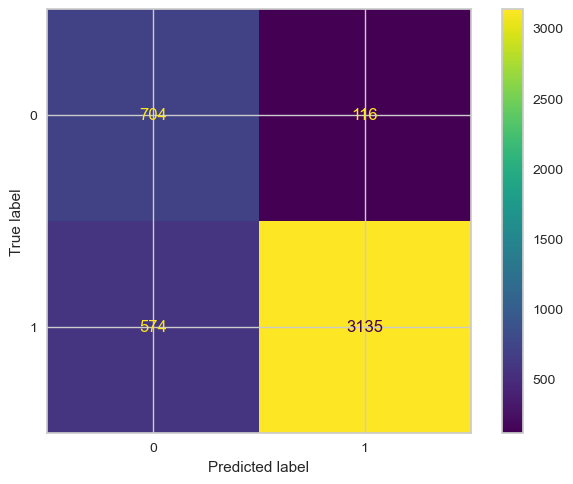

In [52]:
print("LOG MODEL")

eval(log, X_train,X_test)

# Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.23      0.36       820
           1       0.85      0.99      0.92      3709

    accuracy                           0.85      4529
   macro avg       0.86      0.61      0.64      4529
weighted avg       0.86      0.85      0.82      4529

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.30      0.45      3281
           1       0.86      0.99      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.88      0.65      0.69     18112
weighted avg       0.87      0.87      0.84     18112



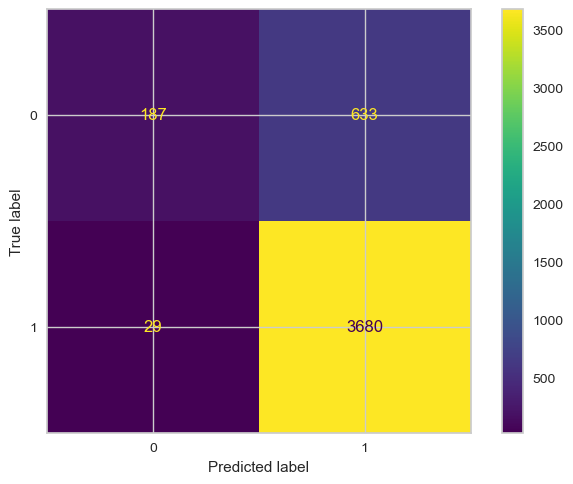

In [54]:
print("NB MODEL")
eval(nb, X_train, X_test)

# Support Vector Machine (SVM)

In [55]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       820
           1       0.96      0.84      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



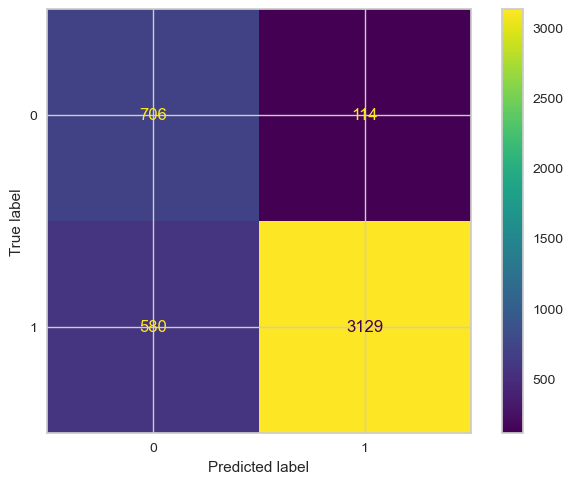

In [56]:
print("SVC MODEL")

eval(svc,X_train, X_test)

# Random Forest

In [57]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.78      0.62       820
           1       0.95      0.84      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.73      0.81      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.89      0.70      3281
           1       0.97      0.86      0.91     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.87      0.81     18112
weighted avg       0.90      0.87      0.87     18112



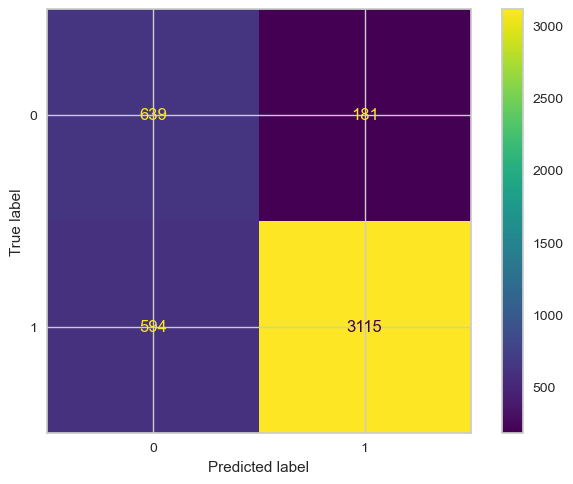

In [58]:
print("RF MODEL")

eval(rf, X_train, X_test)

# DEEP LEARNING MODELLING

In [59]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [60]:
df0 = pd.read_csv('data.csv')
df_dl = df0.copy()
df_dl.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [61]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [62]:
df_dl.shape

(23486, 2)

In [63]:
df_dl.dropna(inplace = True)

In [64]:
df_dl.shape

(22641, 2)

# Tokenization

In [65]:
X = df_dl['Review Text'].values
y = df_dl['Recommended IND'].values

num_words = 10000 
# We have defined the most frequent 10000 repeated words in corpus for tokenizing. We ignore the rest.

tokenizer = Tokenizer(num_words=num_words) 

# The default values of "filters" are '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'. 
# If you also want to filters the numbers, then just "1234567890" at the end. 

tokenizer.fit_on_texts(X)

# Creating Word Index

In [66]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [67]:
len(tokenizer.word_index) 

14847

# Converting Tokens To Numeric

In [68]:
X_num_tokens = tokenizer.texts_to_sequences(X)


In [69]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [70]:
np.array(X_num_tokens)

array([list([253, 532, 917, 3, 662, 3, 68]),
       list([21, 7, 18, 33, 1713, 99, 2, 1322, 8, 221, 5, 9, 4, 106, 3, 36, 314, 2, 131, 1243, 2, 429, 41, 24, 52, 5, 136, 1243, 33, 95, 2, 72, 4, 95, 3, 38, 501, 2, 21, 1, 86, 11, 31, 416, 39, 4, 53, 454, 1, 392, 41, 155, 29, 4, 130, 1372, 11, 438, 439, 6, 772, 95]),
       list([2, 65, 312, 178, 1095, 12, 7, 18, 3, 51, 195, 5, 8, 102, 12, 31, 2, 1152, 52, 1, 95, 46, 17, 236, 22, 10, 2, 219, 7, 8, 29, 6689, 46, 16, 46, 9, 661, 20, 2, 118, 19, 784, 5, 43, 2, 2147, 5, 9, 95, 97, 82, 15, 39, 637, 250, 1, 25, 656, 15, 68, 3, 26, 258, 10, 1, 175, 656, 65, 4, 23, 148, 272, 475, 3, 527, 718, 489, 4601, 151, 975, 1876, 4, 1877, 142, 1589, 15, 1, 4601, 151, 475, 830, 3247, 313, 1, 469, 5, 688]),
       ...,
       list([7, 26, 59, 10, 1, 25, 15, 23, 121, 203, 7, 429, 41, 24, 561, 12, 31, 36, 314, 2, 15, 427, 8, 179, 5, 11, 9, 1, 106, 3, 124, 241, 5, 136, 14, 244, 45, 5, 41, 24, 166, 34]),
       list([2, 72, 7, 18, 12, 4, 592, 2, 24, 7, 138, 3, 33, 

In [71]:
X[105]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [72]:
print(X_num_tokens[105])

[1, 80, 6, 478, 30, 5, 6, 389, 2, 24, 1, 1905, 482, 47, 3, 21, 5, 2, 243, 2182, 210, 189, 563, 14, 92, 3, 871, 313, 4, 283, 109, 5, 78, 130, 8, 22, 30, 2, 239, 32, 4, 46, 9, 75, 103, 143, 5, 6, 1, 2868, 77, 148, 9, 1, 200, 2, 41, 324, 7, 25, 4, 265, 265]


In [73]:
# tokenizer.word_index["The"]
# This code will give you an error since "The" which is not among the most repeated 10000 words was excluded while tokenizing

In [74]:
tokenizer.word_index["shirt"]

80

In [75]:
tokenizer.word_index["exactly"]

478

# The Determination of Maximum Number of Tokens 


In [76]:
# This part is the preparation for padding
num_tokens.mean()

60.39287133960514

In [77]:
num_tokens.max() 

116

In [78]:
num_tokens.argmax()

16263

In [79]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [80]:
len(X[16263])

499

In [81]:
num_tokens.argmin()

820

In [82]:
X[820]

'Great style!'

In [83]:
len(X[820])

12

# Fixing Token Counts of All documents (Pad Sequences)

In [84]:
len(X_num_tokens[105])

63

In [85]:
np.array(X_num_tokens[105])

array([   1,   80,    6,  478,   30,    5,    6,  389,    2,   24,    1,
       1905,  482,   47,    3,   21,    5,    2,  243, 2182,  210,  189,
        563,   14,   92,    3,  871,  313,    4,  283,  109,    5,   78,
        130,    8,   22,   30,    2,  239,   32,    4,   46,    9,   75,
        103,  143,    5,    6,    1, 2868,   77,  148,    9,    1,  200,
          2,   41,  324,    7,   25,    4,  265,  265])

In [86]:
len(X_num_tokens[106])

7

In [87]:
np.array(X_num_tokens[106])

array([  54,   18,   12,  495, 2088, 2955,  452])

In [88]:
num_tokens = [len(tokens) for tokens in X_num_tokens]

num_tokens = np.array(num_tokens)

In [89]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 18])

In [90]:
max_tokens = 103

In [91]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9604699439070712

In [92]:
sum(num_tokens < max_tokens) # the number of documents which have 103 or less tokens

21746

In [93]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [94]:
X_pad.shape

(22641, 103)

In [95]:
X_pad[105]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,   80,    6,  478,
         30,    5,    6,  389,    2,   24,    1, 1905,  482,   47,    3,
         21,    5,    2,  243, 2182,  210,  189,  563,   14,   92,    3,
        871,  313,    4,  283,  109,    5,   78,  130,    8,   22,   30,
          2,  239,   32,    4,   46,    9,   75,  103,  143,    5,    6,
          1, 2868,   77,  148,    9,    1,  200,    2,   41,  324,    7,
         25,    4,  265,  265])

# Train | Set & Split

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)  

# we have been using stratify to prevent imbalance.

# Gated Recurrent Unit

In [97]:
model = Sequential()

In [98]:
embedding_size = 100

In [99]:
model.add(Embedding(input_dim=num_words,        
                    output_dim=embedding_size,                                       
                    input_length=max_tokens,    
                    name='embedding_layer')) 


model.add(GRU(units=48, return_sequences=True))  
model.add(GRU(units=24, return_sequences=True)) 
model.add(GRU(units=12)) 
model.add(Dense(1, activation='sigmoid'))  

In [100]:
optimizer = Adam(learning_rate=0.006)

In [101]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])

In [102]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 103, 100)         1000000   
                                                                 
 gru (GRU)                   (None, 103, 48)           21600     
                                                                 
 gru_1 (GRU)                 (None, 103, 24)           5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1,028,309
Trainable params: 1,028,309
Non-trainable params: 0
_________________________________________________________________


In [103]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [104]:
pd.Series(y_train).value_counts(normalize=True) 

1    0.818849
0    0.181151
dtype: float64

In [105]:
weights = {0:82, 1:18}

In [106]:
model.fit(X_train, y_train, epochs=30, batch_size=256, class_weight=weights,
          validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/30
71/71 [==============================] - 28s 319ms/step - loss: 13.5902 - recall: 0.7525 - val_loss: 0.3874 - val_recall: 0.7970
Epoch 2/30
71/71 [==============================] - 21s 292ms/step - loss: 8.3930 - recall: 0.8713 - val_loss: 0.3169 - val_recall: 0.8744
Epoch 3/30
71/71 [==============================] - 21s 290ms/step - loss: 6.0408 - recall: 0.9064 - val_loss: 0.3625 - val_recall: 0.8609
Epoch 4/30
71/71 [==============================] - 21s 296ms/step - loss: 4.1569 - recall: 0.9345 - val_loss: 0.3925 - val_recall: 0.8566
Epoch 5/30
71/71 [==============================] - 21s 297ms/step - loss: 2.9549 - recall: 0.9563 - val_loss: 0.3837 - val_recall: 0.8862
Epoch 6/30
71/71 [==============================] - 21s 300ms/step - loss: 2.2235 - recall: 0.9683 - val_loss: 0.4186 - val_recall: 0.9286
Epoch 7/30
71/71 [==============================] - 23s 321ms/step - loss: 1.7727 - recall: 0.9746 - val_loss: 0.4962 - val_recall: 0.8997
Epoch 8/30
71/71 [========

# Model Evaluation

In [107]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,13.590199,0.752478,0.387430,0.796980
1,8.392962,0.871283,0.316889,0.874360
2,6.040784,0.906412,0.362454,0.860879
3,4.156930,0.934529,0.392501,0.856565
4,2.954866,0.956308,0.383717,0.886223


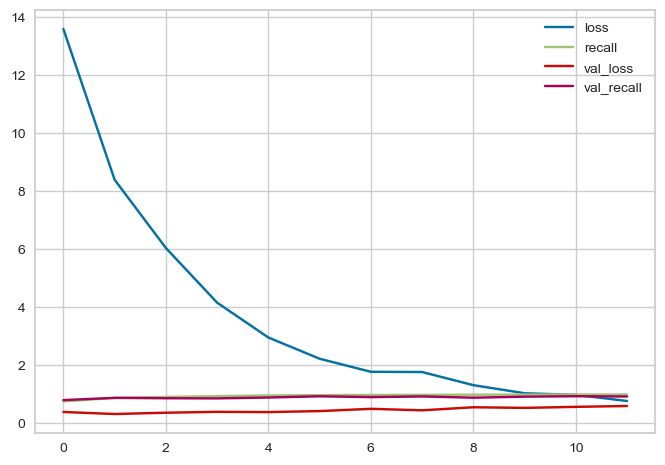

In [108]:
model_loss.plot();

In [109]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 14s 25ms/step - loss: 0.2243 - recall: 0.8992


[0.22430607676506042, 0.8991976380348206]

In [110]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 4s 27ms/step - loss: 0.3169 - recall: 0.8744


[0.31688937544822693, 0.874359667301178]

In [111]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")  

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 13s 21ms/step
[[ 3166   115]
 [ 1495 13336]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.96      0.80      3281
           1       0.99      0.90      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.84      0.93      0.87     18112
weighted avg       0.93      0.91      0.92     18112



In [112]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")  

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 14s 25ms/step
[[ 3166   115]
 [ 1495 13336]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.96      0.80      3281
           1       0.99      0.90      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.84      0.93      0.87     18112
weighted avg       0.93      0.91      0.92     18112



# PREDICTION

In [113]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'Very comfortable, material is good, cut out on sleeves flattering'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [114]:
# Let's convert reviews above to numeric by tokenizing..
tokens = tokenizer.texts_to_sequences(reviews) 

In [115]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 103)

In [116]:
mod_pred = model.predict(tokens_pad)

1/1 [==============================] - 1s 1s/step


In [118]:
mod_pred

array([[0.92147565],
       [0.9817745 ],
       [0.9597506 ],
       [0.9885548 ],
       [0.9838805 ],
       [0.5686288 ],
       [0.9813144 ],
       [0.04535708],
       [0.19133152],
       [0.16997851],
       [0.96298766],
       [0.09325045],
       [0.59516245],
       [0.9173181 ]], dtype=float32)

In [119]:
df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [122]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Recommended" if x>=0.5 else "Not Recommended")

In [123]:
df_pred

,Pred_Proba,Predicted_Feedbaack
Love this dress,0.921476,Recommended
Absolutely wonderful. silky and sexy and comfortable,0.981775,Recommended
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,0.959751,Recommended
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.988555,Recommended
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.983881,Recommended
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",0.568629,Recommended
I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0.981314,Recommended
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,0.045357,Not Recommended
"if you are at least average height or taller, this may look good on you.",0.191332,Not Recommended
"sadly will be returning, but i'm sure i will find something to exchange it for!",0.169979,Not Recommended


In [125]:
import pickle
# save model
pickle.dump(nb, open('nb_model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [126]:
# load model to make predictions
model = pickle.load(open('nb_model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

In [132]:
text = 'Very comfortable, material is good, cut out on sleeves flattering'
text = cleaning_data(text)
text = vectorizer.transform([text]).toarray()
pred=model.predict(text)[0]
if pred == 1:
    print("Postive Review")
elif pred == 0:
    print("Nagetive Review")

Postive Review
